# Online Retail Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import warnings
import csv
import sys
import os

from collections import defaultdict, Counter

%matplotlib inline
plt.rcParams.update({'font.size':12})

sb.set_style('darkgrid')
sb.set_palette('viridis')
sb.set()

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv(r"D:\Open Classroom\Datasets\Online Retail Data\Online_Retail.csv", encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


### Statistical analysis

In [49]:
df.shape

(541909, 8)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [51]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [52]:
round(df.describe(), 2)

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


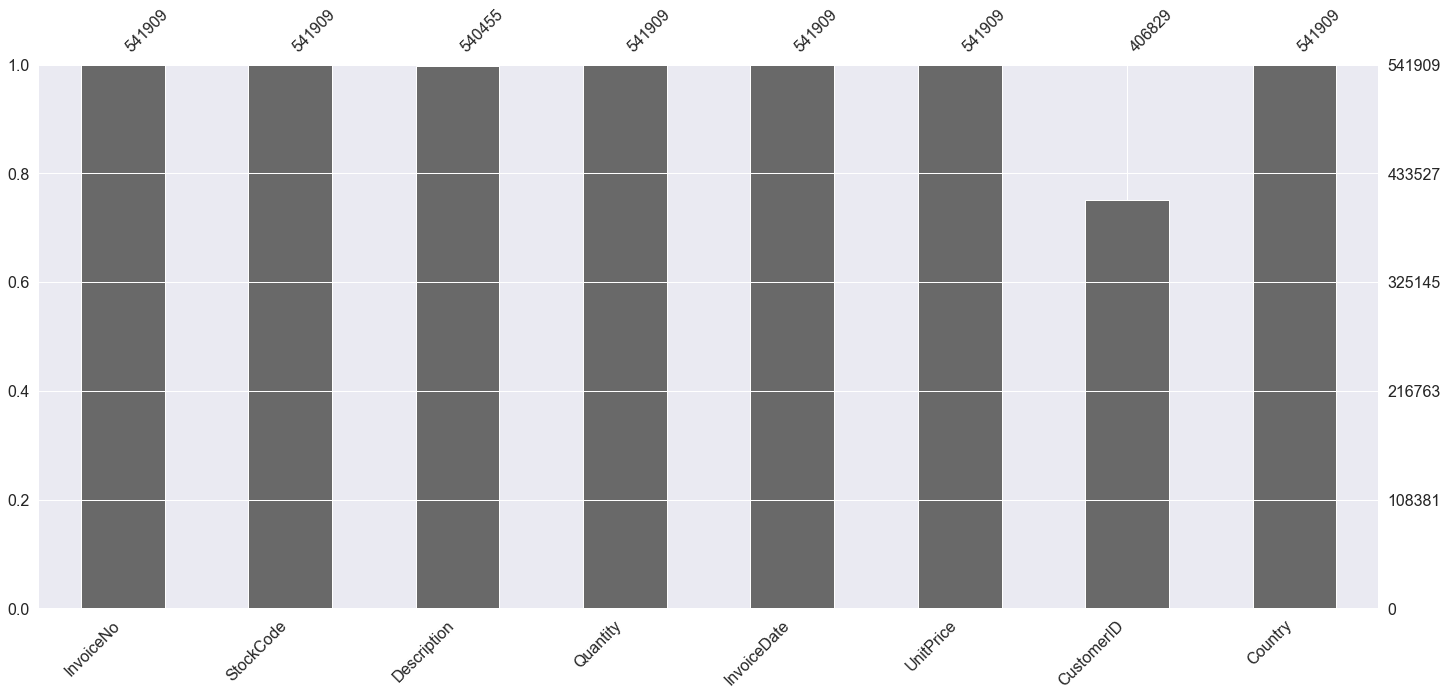

In [53]:
msno.bar(df)

Text(0.5, 1.0, 'Pearsons Correlation of columns')

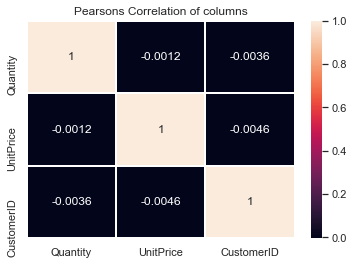

In [54]:
sb.heatmap(df.corr(), annot = True, linewidths=0.9)
plt.title('Pearsons Correlation of columns')

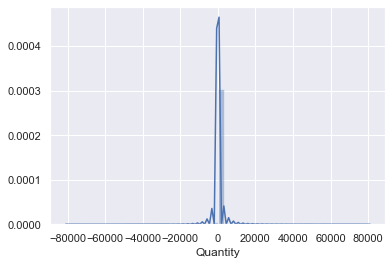

In [55]:
sb.distplot(df['Quantity'])

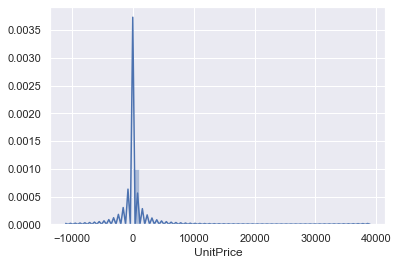

In [56]:
sb.distplot(df['UnitPrice'])

In [57]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [58]:
df['Description'].replace(np.nan, 'Null', inplace = True)

In [59]:
df['CustomerID'].fillna('missing', inplace = True)

In [60]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [61]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
4 GOLD FLOCK CHRISTMAS BALLS             1
PINK ALLIUM  ARTIFICIAL FLOWER           1
on cargo order                           1
throw away                               1
PEARL & SHELL 42"NECKL. IVORY            1
Name: Description, Length: 4224, dtype: int64

In [62]:
df['Country'].value_counts().head(10)

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Netherlands         2371
Belgium             2069
Switzerland         2002
Portugal            1519
Australia           1259
Name: Country, dtype: int64

In [63]:
df['Quantity'].value_counts().head()

1     148227
2      81829
12     61063
6      40868
4      38484
Name: Quantity, dtype: int64

In [64]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Text(0.5, 1.0, 'Yearly Sales')

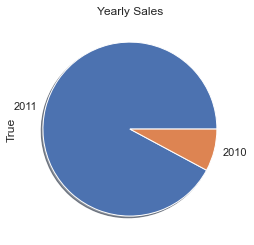

In [65]:
df['InvoiceDate'].dt.year.value_counts().plot(kind = 'pie', label = True, shadow = True)
plt.title('Yearly Sales')

In [66]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [67]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34


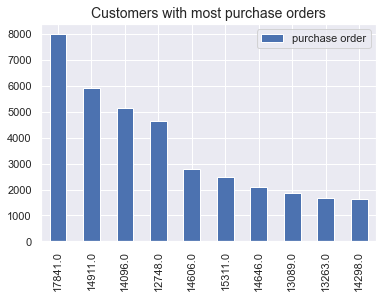

In [68]:
missing = df[df['CustomerID'] != 'missing']
missing['CustomerID'] = pd.to_numeric(missing['CustomerID']).value_counts().head(10).plot(kind = 'bar', label = 'purchase order')
plt.title('Customers with most purchase orders', fontdict = {'size':14})
plt.legend(loc = 'best')

Text(0.5, 1.0, 'Days against their sales order')

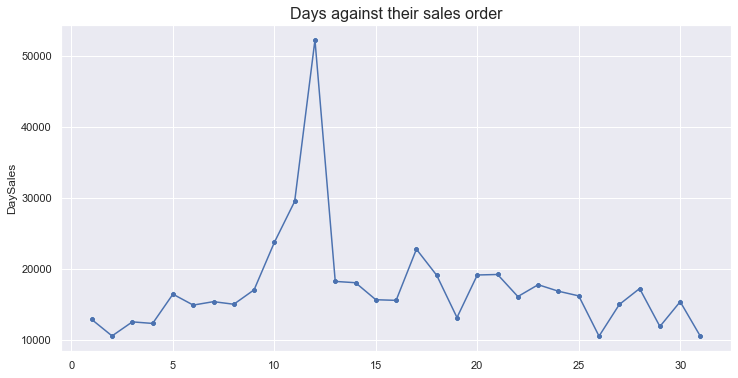

In [69]:
plt.figure(figsize = (12, 6))
day = df['InvoiceDate'].dt.day.value_counts().to_frame().rename(columns = {'InvoiceDate':'DaySales'})
sb.scatterplot(x = day.index, y = day['DaySales'])
sb.lineplot(x = [x for x in day.index], y = day['DaySales'])
plt.title('Days against their sales order', fontdict = {'size':16})

- The 12th day of the month recorded the best selling day followed by day 11. 
- However day 31 which is endmonth had the lowest sales

Text(0, 0.5, "Sales in '000")

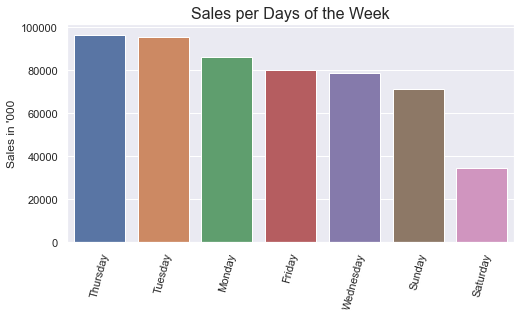

In [157]:
plt.figure(figsize = (8,4))
wkday = df['InvoiceDate'].dt.day_name().value_counts().to_frame().rename(columns = {'InvoiceDate':'WeekSales'})
sb.barplot(x = wkday.index, y = wkday['WeekSales'])
plt.title('Sales per Days of the Week', fontdict = {'size':16})
plt.xticks(rotation = 75)
plt.ylabel("Sales in '000")

- Thursday and Tuesday records the highest days for sales while Saturday closes the bar with lowest sales

Text(0, 0.5, 'Total Sales')

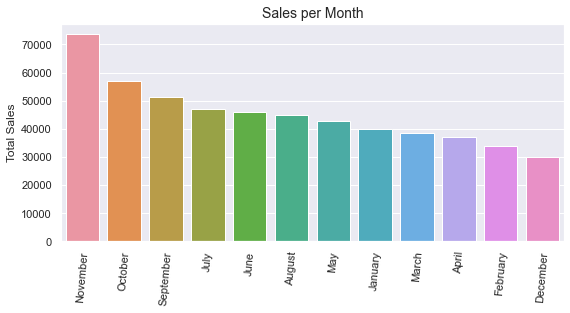

In [71]:
plt.figure(figsize = (9, 4))
monthly = df['InvoiceDate'].dt.month_name().value_counts().to_frame().rename(columns = {'InvoiceDate':'MonthlySales'})
sb.barplot(monthly.index, monthly['MonthlySales'])
plt.xticks(rotation = 85)
plt.title('Sales per Month', fontdict = {'size':14})
plt.ylabel('Total Sales')

- November sets the bar for the highest sales per month, October wins seconds slot

In [72]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,20.34


Text(0.5, 0, '')

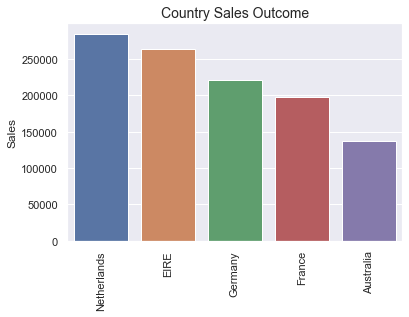

In [91]:
plt.figure(figsize = (6, 4))
exclude_UK = df[df['Country'] != 'United Kingdom']
country = exclude_UK.groupby('Country')
get_sales = country['Sales'].sum().to_frame().sort_values(by = 'Sales', ascending = False).head()
sb.barplot(get_sales.index, get_sales['Sales'])
plt.title('Country Sales Outcome', fontdict = {'size':14})
plt.xticks(rotation = 90)
plt.xlabel(None)

Text(0.5, 0, '')

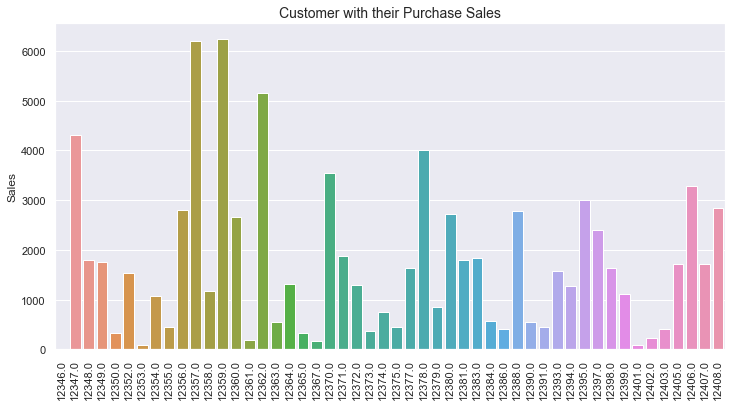

In [158]:
plt.figure(figsize = (12,6))
cust_sales = df.groupby('CustomerID')
sales_per_cust = cust_sales['Sales'].sum().head(50).to_frame()#.sort_values(by = 'Sales', ascending = True)
sb.barplot(x = sales_per_cust.index, y = sales_per_cust['Sales'])
plt.title('Customer with their Purchase Sales', fontdict = {'size':14})
plt.xticks(rotation = 90)
plt.xlabel(None)